In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.preprocessing import StandardScaler
import numpy as np # Numpy - Numerical Python
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data1 = pd.read_excel('jantung1.xls')
data2 = pd.read_excel('jantung2.xls')
data3 = pd.read_excel('jantung3.xls')
data4 = pd.read_excel('jantung4.xls')
data5 = pd.read_excel('jantung5.xls')

In [ ]:
data1

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000000,-0.760259,-0.756046,-0.333420,1.122839
1,0.007904,-0.760259,-0.756046,-0.333420,1.122839
2,0.012207,-0.748791,-0.738864,-0.325506,1.101164
3,0.016510,-0.748791,-0.738864,-0.325506,1.101164
4,0.021545,-0.889490,-0.951860,-0.315022,1.340325
...,...,...,...,...,...
10543,53.089584,-0.046713,0.036447,0.114474,0.128898
10544,53.094620,0.030049,-0.121930,0.191685,0.229157
10545,53.099655,0.030049,-0.121930,0.191685,0.229157
10546,53.104691,0.027571,-0.123433,0.190237,0.228443


In [ ]:
x1 = data1['Linear Acceleration x (m/s^2)']
t1 = data1['Time (s)']
x2 = data2['Linear Acceleration x (m/s^2)']
t2 = data2['Time (s)']
x3 = data3['Linear Acceleration x (m/s^2)']
t3 = data3['Time (s)']
x4 = data4['Linear Acceleration x (m/s^2)']
t4 = data4['Time (s)']
x5 = data5['Linear Acceleration x (m/s^2)']
t5 = data5['Time (s)']

Text(0.5, 1.0, 'Percobaan 1')

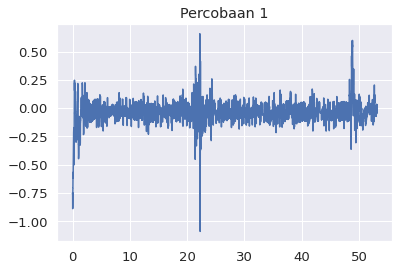

In [ ]:
plt.plot(t1,x1)
plt.title('Percobaan 1')

Text(0.5, 1.0, 'Percobaan 2')

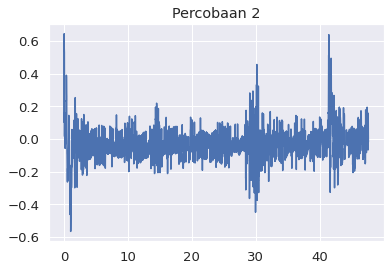

In [ ]:
plt.plot(t2,x2)
plt.title('Percobaan 2')

Text(0.5, 1.0, 'Percobaan 3')

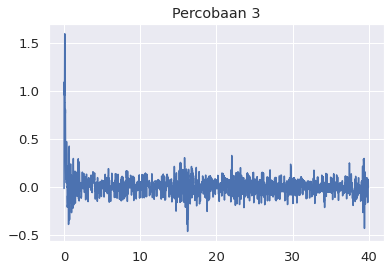

In [ ]:
plt.plot(t3,x3)
plt.title('Percobaan 3')

Text(0.5, 1.0, 'Percobaan 4')

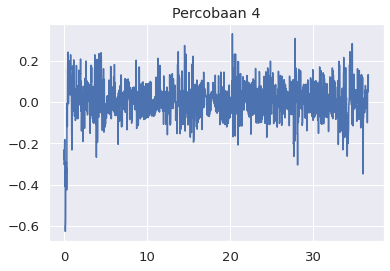

In [ ]:
plt.plot(t4,x4)
plt.title('Percobaan 4')

Text(0.5, 1.0, 'Percobaan 5')

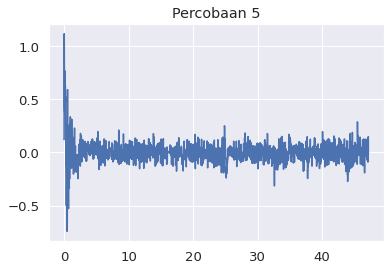

In [ ]:
plt.plot(t5,x5)
plt.title('Percobaan 5')

In [ ]:
# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz

In [ ]:
nyq = 0.5 * fs  # Nyquist Frequency

In [ ]:
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [ ]:
def butter_lowpass_filter(x5, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, x5)
    return y

In [ ]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(x5, cutoff, fs, order)

In [ ]:
fig = go.Figure()

In [ ]:
fig.add_trace(go.Scatter(
            y = x5,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))

In [ ]:
fig.show()